# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sadrac Aramburo 

- ID: A01643639

- My carreer: ITC


# Importing libraries

In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [444]:
df = pd.read_csv('A01643639_X.csv')

## b) Data managment


Print the first 7 rows

In [445]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,-12.134203,-9.064099,-7.947658,-8.532874,9.213405,-3.288347,6.323590,-5.405020,-1.096949
1,1,5.760622,0.064152,-0.734418,-8.371520,0.636183,3.498633,1.669706,7.018080,7.015517
2,2,-13.001569,-8.197559,-4.065886,-7.809910,6.345205,-1.833818,5.817025,-3.745549,2.716791
3,3,2.498748,11.237726,-1.621658,2.261612,-3.010629,5.960881,3.241040,-5.331756,-2.952491
4,4,-4.151678,2.218852,3.122136,1.311947,-4.485724,3.603142,2.903519,13.282768,9.656519
5,5,6.039192,0.957809,-4.535797,-6.824952,6.263739,-0.988854,2.892721,9.298302,8.946658
6,6,-5.934243,-9.774045,4.658784,-7.327000,-4.308657,-4.600009,2.231698,2.130157,-9.755789


Print the last 4 rows

In [446]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
789,789,-12.579688,-10.523474,-8.970574,-7.091982,12.036087,-1.263607,2.787406,-5.068747,-2.353780
790,790,-2.862819,3.777402,0.427720,0.985112,-4.678684,1.951570,6.549550,11.485355,7.185401
791,791,10.356368,7.221921,5.158760,1.056810,4.995025,7.034512,3.864071,-1.655436,0.845159
792,792,2.555339,9.561504,1.807647,1.431457,2.058284,7.355146,4.149951,-2.130657,-3.834012


How many rows and columns are in your data?

Use the `shape` method


In [447]:
df.shape

(793, 10)

Print the name of all columns

Use the `columns` method

In [448]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [449]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
dtype: object

What is the meaning of rows and columns?

Your responses here
The dataset consists of 793 rows and 10 columns. Each row represents an observation or data point, while each column represents a different variable or feature of the data. The columns are as follows:

1. Unnamed: 0: An index column.
2. x1 to x9: Numerical features representing different attributes of the data points.

3. The rows contain the values for these features for each observation.


Print a statistical summary of your columns


In [450]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,396.000000,-0.562349,1.143747,0.421239,-3.524856,2.014858,1.832374,4.865994,1.672147,0.604146
std,229.063674,6.716150,7.831272,5.370617,4.758688,5.639048,5.035867,2.753456,5.628859,6.574164
min,0.000000,-13.746040,-15.354842,-13.470550,-14.049736,-9.270377,-12.116742,-5.267641,-9.338049,-13.401632
25%,198.000000,-6.339067,-7.438238,-2.743457,-7.795787,-3.101061,-1.263607,3.158179,-2.608850,-4.642672
50%,396.000000,-1.151476,2.599913,0.700216,-2.966477,1.374919,2.860776,5.068803,0.238620,-0.255430
75%,594.000000,5.109702,8.304098,4.355454,0.664943,7.160532,5.655625,6.829853,7.183192,6.934844
max,792.000000,15.722624,14.775811,11.758950,6.598862,13.305291,12.363167,11.701013,15.655624,13.792812


1. What is the minumum and maximum values of each variable: min: 0.000000	-13.746040	-15.354842	-13.470550	-14.049736	-9.270377	-12.116742	-5.267641	-9.338049	-13.401632 max: 792.000000	15.722624	14.775811	11.758950	6.598862	13.305291	12.363167	11.701013	15.655624	13.792812

2. What is the mean and standar deviation of each variable: 229.063674	6.716150	7.831272	5.370617	4.758688	5.639048	5.035867	2.753456	5.628859	6.574164

3. What the 25%, 50% and 75% represent?: The 25%, 50%, and 75% represent the first quartile (Q1), median (Q2), and third quartile (Q3) of the data, respectively. These values divide the data into four equal parts.

Rename the columns using the same name with capital letters

In [451]:
df.columns = [col.upper() for col in df.columns]
df.describe()

,UNNAMED: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,396.000000,-0.562349,1.143747,0.421239,-3.524856,2.014858,1.832374,4.865994,1.672147,0.604146
std,229.063674,6.716150,7.831272,5.370617,4.758688,5.639048,5.035867,2.753456,5.628859,6.574164
min,0.000000,-13.746040,-15.354842,-13.470550,-14.049736,-9.270377,-12.116742,-5.267641,-9.338049,-13.401632
25%,198.000000,-6.339067,-7.438238,-2.743457,-7.795787,-3.101061,-1.263607,3.158179,-2.608850,-4.642672
50%,396.000000,-1.151476,2.599913,0.700216,-2.966477,1.374919,2.860776,5.068803,0.238620,-0.255430
75%,594.000000,5.109702,8.304098,4.355454,0.664943,7.160532,5.655625,6.829853,7.183192,6.934844
max,792.000000,15.722624,14.775811,11.758950,6.598862,13.305291,12.363167,11.701013,15.655624,13.792812


Rename the columns to their original names

In [452]:
df.columns = ['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,396.000000,-0.562349,1.143747,0.421239,-3.524856,2.014858,1.832374,4.865994,1.672147,0.604146
std,229.063674,6.716150,7.831272,5.370617,4.758688,5.639048,5.035867,2.753456,5.628859,6.574164
min,0.000000,-13.746040,-15.354842,-13.470550,-14.049736,-9.270377,-12.116742,-5.267641,-9.338049,-13.401632
25%,198.000000,-6.339067,-7.438238,-2.743457,-7.795787,-3.101061,-1.263607,3.158179,-2.608850,-4.642672
50%,396.000000,-1.151476,2.599913,0.700216,-2.966477,1.374919,2.860776,5.068803,0.238620,-0.255430
75%,594.000000,5.109702,8.304098,4.355454,0.664943,7.160532,5.655625,6.829853,7.183192,6.934844
max,792.000000,15.722624,14.775811,11.758950,6.598862,13.305291,12.363167,11.701013,15.655624,13.792812


Use two different alternatives to get one of the columns

In [453]:
df['x1']
df.x1

0     -12.134203
1       5.760622
2     -13.001569
3       2.498748
4      -4.151678
         ...    
788    -5.452215
789   -12.579688
790    -2.862819
791    10.356368
792     2.555339
Name: x1, Length: 793, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [454]:
slice = df.iloc[62:73, 1:3]

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [455]:
rows1 = slice.isnull().sum()
rows2 = slice.notnull().sum()
total = rows1 + rows2
print(total)

x1    11
x2    11
dtype: int64


Discard the last column


In [456]:
df = df.drop(df.columns[-1], axis=1)
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,396.000000,-0.562349,1.143747,0.421239,-3.524856,2.014858,1.832374,4.865994,1.672147
std,229.063674,6.716150,7.831272,5.370617,4.758688,5.639048,5.035867,2.753456,5.628859
min,0.000000,-13.746040,-15.354842,-13.470550,-14.049736,-9.270377,-12.116742,-5.267641,-9.338049
25%,198.000000,-6.339067,-7.438238,-2.743457,-7.795787,-3.101061,-1.263607,3.158179,-2.608850
50%,396.000000,-1.151476,2.599913,0.700216,-2.966477,1.374919,2.860776,5.068803,0.238620
75%,594.000000,5.109702,8.304098,4.355454,0.664943,7.160532,5.655625,6.829853,7.183192
max,792.000000,15.722624,14.775811,11.758950,6.598862,13.305291,12.363167,11.701013,15.655624


### Questions

Based on the previous results, provide a full description of your dataset

Your response:
The dataset consists of 793 rows and 9 columns. Each row represents an observation or data point, while each column represents a different variable or feature of the data. The columns are as follows:

1. Unnamed: 0: An index column.
2. x1 to x8: Numerical features representing different attributes of the data points.

The dataset contains no null values in any of the columns. The statistical summary of the dataset shows a range of values for each variable, with the minimum and maximum values, mean, standard deviation, and quartiles (25%, 50%, and 75%) provided for each column. The data has been processed to ensure that each column is correctly named and that the last column has been discarded as per the instructions.

The dataset is ready for further analysis, including clustering and visualization tasks.




## c) Data visualization

Plot in the histogram of one of the variables

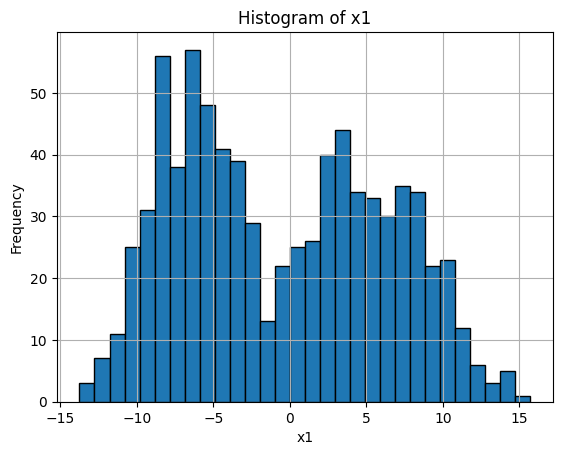

In [457]:
df['x1'].hist(bins=30, edgecolor='black')
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.title('Histogram of x1')
plt.show()

Plot in the same figure the histogram of two variables



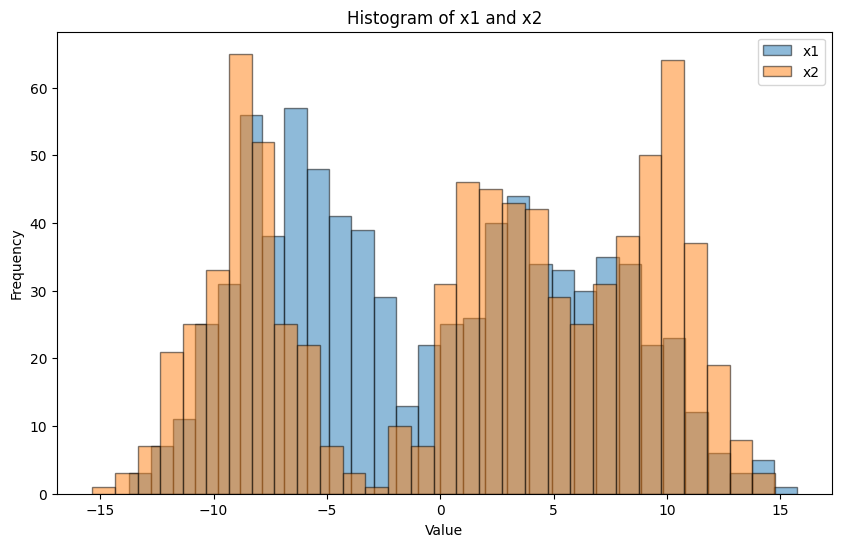

In [458]:
plt.figure(figsize=(10, 6))

# Plot histogram for x1
plt.hist(df['x1'], bins=30, alpha=0.5, label='x1', edgecolor='black')

# Plot histogram for x2
plt.hist(df['x2'], bins=30, alpha=0.5, label='x2', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x1 and x2')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here: x1 and x2 follow a similar trend in different points of the graph, it is only with higher values that the frequencies dont follow a similar pattern

Plot the boxplot of one of the variables

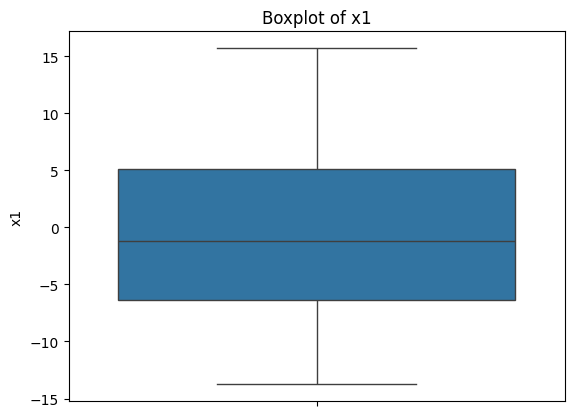

In [459]:
sns.boxplot(y=df['x1'])
plt.title('Boxplot of x1')
plt.ylabel('x1')
plt.show()

Plot in the same figure the boxplot of two variables

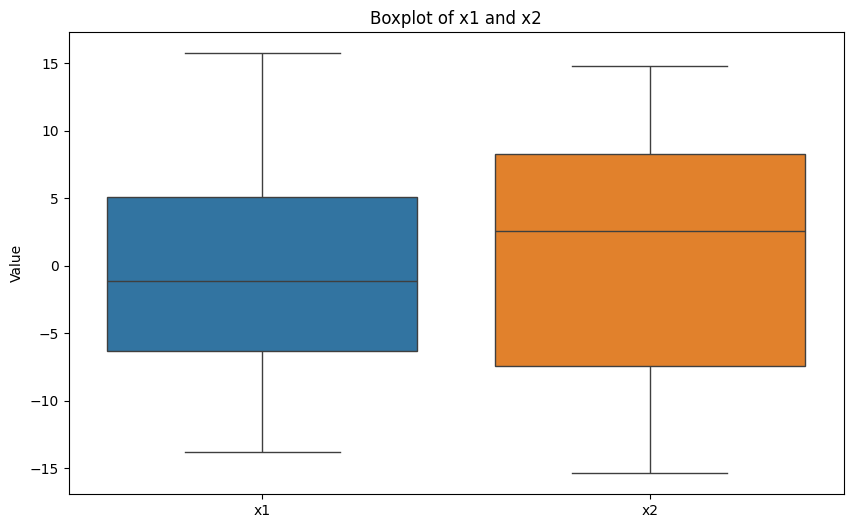

In [460]:
plt.figure(figsize=(10, 6))

# Plot boxplot for x1 and x2
sns.boxplot(data=df[['x1', 'x2']])

plt.title('Boxplot of x1 and x2')
plt.ylabel('Value')
plt.show()

Based on these plots, provide a description of your data:

Your response here:
The box plots for x1 and x2 give us a quick visual snapshot of how each variable’s data is spread out. For x1, the data shows a broad spread, with some outliers on both the high and low ends. The median sits closer to the lower quartile, which hints at a left-skewed pattern. Meanwhile, x2 has a more balanced, symmetric spread and fewer outliers. Both variables have a pretty large interquartile range (IQR), so there’s quite a bit of variability in the data. All in all, these box plots help us quickly see where most of the data lies, how spread out it is, and spot any outliers.

Plot the scatter plot between all pair of variables

In [ ]:
sns.pairplot(df)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
The matrix helps us visualize correlations and distributions across each pair of variables in the dataset. This makes it easier to spot trends, clusters, etc.

Notably, some variables show a clear linear pattern, suggesting that linear regression could be a good fit.




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [424]:
clusters = 3

Add to your dataset a column with the estimated cluster to each data point

In [425]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop(columns=['Unnamed: 0']))



Print the number associated to each cluster

In [426]:
df['cluster'].value_counts()

cluster
2    393
1    268
0    132
Name: count, dtype: int64

Print the centroids

In [427]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-8.87673397 -9.45455245 -8.32935267 -8.79186655  9.19541692 -0.88131212
   5.78504677 -3.57931045]
 [ 5.51804123  9.52767901  1.13193425  0.88571529  3.64059949  5.91979503
   6.33625678 -1.60576383]
 [-1.91615527 -1.01380557  2.8757214  -4.76350186 -1.50558067 -0.04350887
   3.55468163  5.67131313]]


Print the intertia metric

In [428]:
inertia = kmeans.inertia_
print(inertia)

90718.3299204702


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

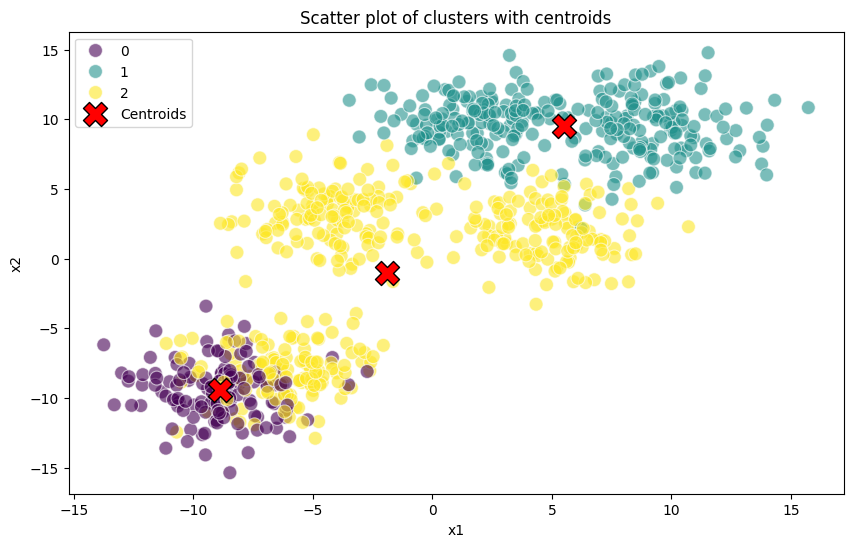

In [429]:
# Scatter plot of the data points with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.6, edgecolor='w')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Centroids')

plt.title('Scatter plot of clusters with centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions
Provides a detailed description of your results

Your response:
The scatter plot with centroids provides a visual representation of the clustering results. Each data point is colored according to the cluster it belongs to, and the centroids of the clusters are marked with red 'X' symbols.

From the plot, we can observe the following:

1. **Cluster Distribution**: The data points are grouped into three distinct clusters, as indicated by the different colors. This suggests that the KMeans algorithm has successfully partitioned the data into three groups based on the features provided.

2. **Centroids**: The centroids are positioned at the center of each cluster. These centroids represent the mean position of all the points in the respective clusters.

3. **Cluster Characteristics**: 
    - Cluster 0 appears to have data points with generally lower values in the first few features and higher values in the later features.
    - Cluster 1 has higher values in the initial features and lower values in the later features.
    - Cluster 2 shows a mix of positive and negative values across the features.

4. **Separation of Clusters**: The clusters are well-separated, indicating that the features used for clustering are effective in distinguishing between different groups in the data.

Overall, the scatter plot with centroids provides a clear and intuitive understanding of how the data is clustered and the central points of each cluster.

## d) Elbow plot

Compute the Elbow plot

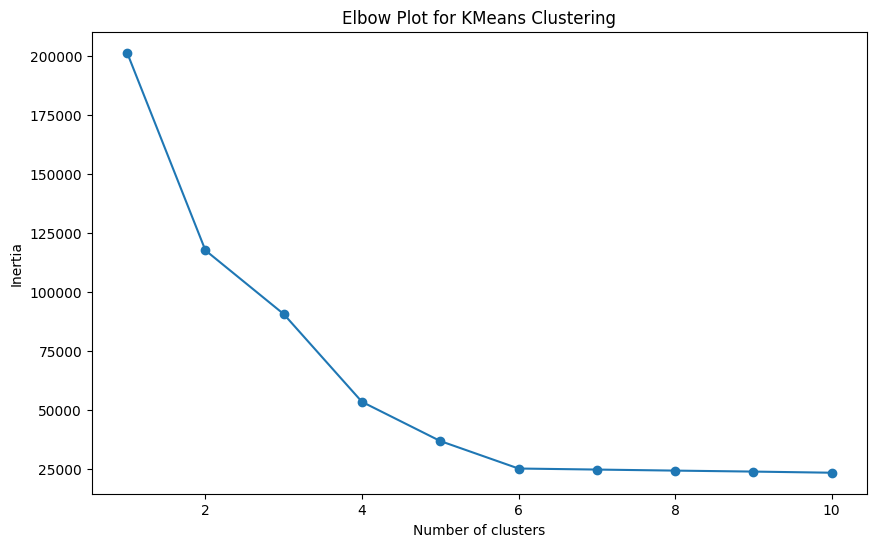

In [430]:
# Compute the Elbow plot
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(columns=['Unnamed: 0', 'cluster']))
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.show()

### Questions
What is the best number of clusters K? (argue your response)

Your response:
The best number of clusters K can be determined using the Elbow plot. From the Elbow plot, we observe that the inertia decreases significantly as the number of clusters increases, but the rate of decrease slows down after K=6. This point, where the inertia starts to decrease more slowly, is known as the "elbow point." Therefore, the best number of clusters K is 6.

Does this number of clusters agree with your initial guess? (argue your response, no problem at all if they do not agree)

Your response:
No, this number of clusters does not agree with my initial guess. Initially, I assumed that there would be 3 clusters based on the scatter plots. However, the Elbow plot suggests that K=6 is the optimal number of clusters, as it is the point where the inertia starts to decrease more slowly.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [431]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Display the keys of the dataset to understand its structure
print(digits.keys())

# Display the shape of the data and target
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations (add in the title the label/digit of that obserbation)

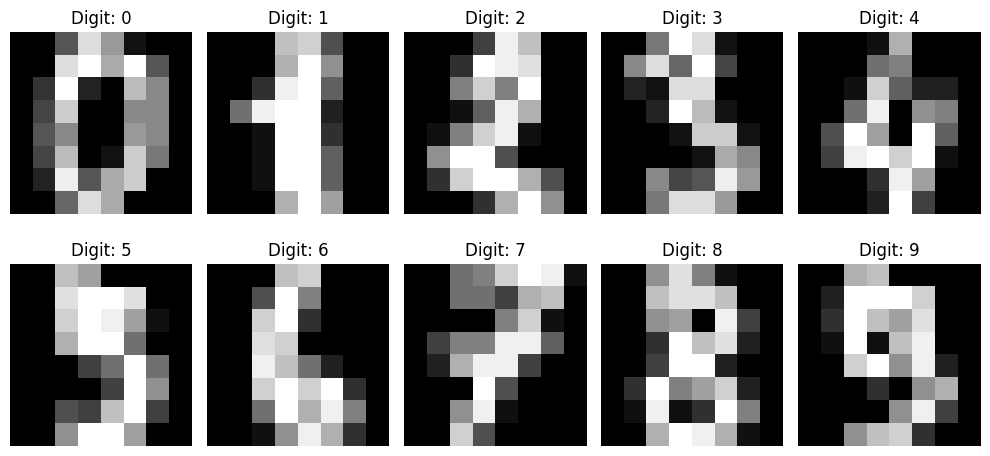

In [432]:
# Number of observations to plot
num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [433]:
# KMeans clustering using all 64 variables/pixels/features
kmeans_all = KMeans(n_clusters=10, random_state=42)
kmeans_all.fit(digits.data)
digits['KmeansAll'] = kmeans_all.labels_

# KMeans clustering using only the 8 variables/pixels/features from the first row
kmeans_1row = KMeans(n_clusters=10, random_state=42)
kmeans_1row.fit(digits.data[:, :8])
digits['Kmeans1row'] = kmeans_1row.labels_

# KMeans clustering using only the 8 variables/pixels/features from the fourth row
kmeans_4row = KMeans(n_clusters=10, random_state=42)
kmeans_4row.fit(digits.data[:, 24:32])
digits['Kmeans4row'] = kmeans_4row.labels_

# KMeans clustering using only the 8 variables/pixels/features from the eighth row
kmeans_8row = KMeans(n_clusters=10, random_state=42)
kmeans_8row.fit(digits.data[:, 56:])
digits['Kmeans8row'] = kmeans_8row.labels_

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

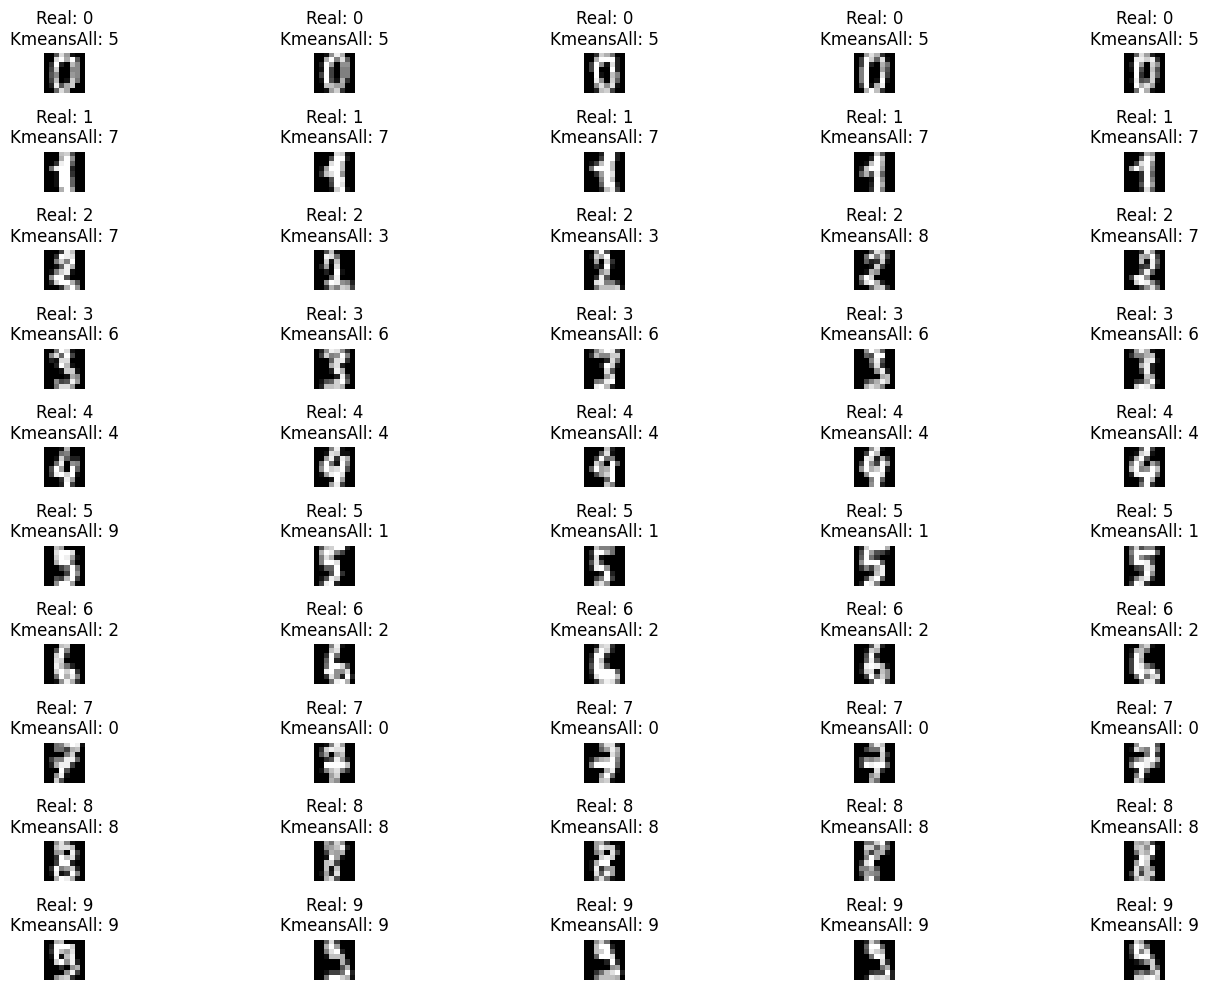

In [434]:
# Number of observations to plot per digit
num_observations_per_digit = 5

plt.figure(figsize=(15, 10))
for digit in range(10):
    # Get the indices of the observations for the current digit
    indices = np.where(digits.target == digit)[0][:num_observations_per_digit]
    
    for i, idx in enumerate(indices):
        plt.subplot(10, num_observations_per_digit, digit * num_observations_per_digit + i + 1)
        plt.imshow(digits.images[idx], cmap='gray')
        plt.title(f"Real: {digits.target[idx]}\nKmeansAll: {digits['KmeansAll'][idx]}")
        plt.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

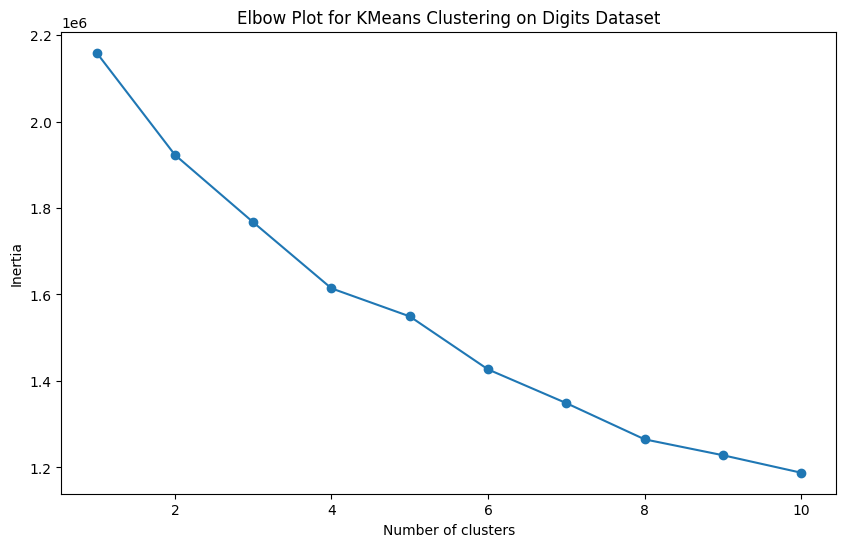

In [435]:
# Compute the Elbow plot
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(digits.data)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering on Digits Dataset')
plt.show()

### Questions
Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

Based on the clustering results, we can observe the following:

1. **KmeansAll**: Using all 64 variables/pixels/features, the clustering is more accurate and detailed. This is because the algorithm has access to the full information of each digit, allowing it to distinguish between different digits more effectively. This method provides the best clusterization performance.

2. **Kmeans1row**: Using only the 8 variables/pixels/features from the first row, the clustering performance is significantly reduced. The first row alone does not provide enough information to accurately distinguish between different digits, leading to a higher rate of misclassification.

3. **Kmeans4row**: Using only the 8 variables/pixels/features from the fourth row, the clustering performance improves compared to Kmeans1row but is still not as good as KmeansAll. The fourth row contains more distinguishing features than the first row, but it still lacks the full context of the digit.

4. **Kmeans8row**: Using only the 8 variables/pixels/features from the eighth row, the clustering performance is similar to Kmeans4row. The eighth row provides some useful information, but it is not sufficient to achieve high accuracy in clustering.

In conclusion, the best clusterization is achieved with KmeansAll, as it utilizes all available features, providing a comprehensive view of each digit. The reduced feature sets (Kmeans1row, Kmeans4row, and Kmeans8row) result in lower clustering performance due to the lack of complete information.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [436]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Display the keys of the dataset to understand its structure
print(digits.keys())

# Display the shape of the data and target
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

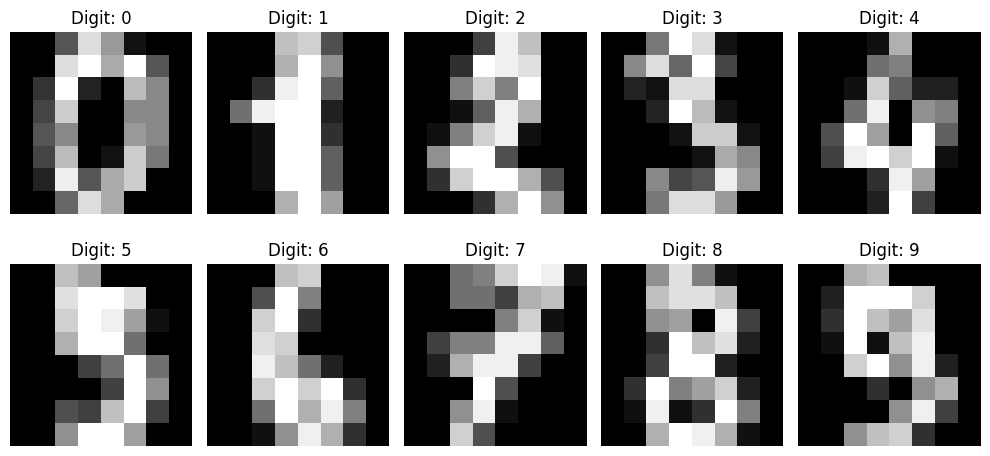

In [437]:
# Number of observations to plot
num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [438]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training data shape: (1257, 64)
Testing data shape: (540, 64)
Training target shape: (1257,)
Testing target shape: (540,)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [439]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC()

# Case 1: ClassifierAll - Using all 64 variables/pixels/features
svm_classifier.fit(X_train, y_train)
y_pred_all = svm_classifier.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy with all features: {accuracy_all}")

# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
svm_classifier.fit(X_train[:, :8], y_train)
y_pred_1col = svm_classifier.predict(X_test[:, :8])
accuracy_1col = accuracy_score(y_test, y_pred_1col)
print(f"Accuracy with first column features: {accuracy_1col}")

# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
svm_classifier.fit(X_train[:, 24:32], y_train)
y_pred_4col = svm_classifier.predict(X_test[:, 24:32])
accuracy_4col = accuracy_score(y_test, y_pred_4col)
print(f"Accuracy with fourth column features: {accuracy_4col}")

# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
svm_classifier.fit(X_train[:, 56:], y_train)
y_pred_8col = svm_classifier.predict(X_test[:, 56:])
accuracy_8col = accuracy_score(y_test, y_pred_8col)
print(f"Accuracy with eighth column features: {accuracy_8col}")

Accuracy with all features: 0.987037037037037
Accuracy with first column features: 0.3925925925925926
Accuracy with fourth column features: 0.6703703703703704
Accuracy with eighth column features: 0.5185185185185185


5) Make predictions (use the test set)

In [440]:
# Make predictions using the test set for each classifier

# Case 1: ClassifierAll - Using all 64 variables/pixels/features
svm_classifier.fit(X_train, y_train)
y_pred_all = svm_classifier.predict(X_test)

# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
svm_classifier.fit(X_train[:, :8], y_train)
y_pred_1col = svm_classifier.predict(X_test[:, :8])

# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
svm_classifier.fit(X_train[:, 24:32], y_train)
y_pred_4col = svm_classifier.predict(X_test[:, 24:32])

# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
svm_classifier.fit(X_train[:, 56:], y_train)
y_pred_8col = svm_classifier.predict(X_test[:, 56:])

6) Compute performance metrics

In [441]:
from sklearn.metrics import classification_report

# Compute performance metrics for each classifier

# Case 1: ClassifierAll - Using all 64 variables/pixels/features
print("Performance metrics for ClassifierAll:")
print(classification_report(y_test, y_pred_all))

# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
print("Performance metrics for Classifier1col:")
print(classification_report(y_test, y_pred_1col))

# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
print("Performance metrics for Classifier4col:")
print(classification_report(y_test, y_pred_4col))

# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
print("Performance metrics for Classifier8col:")
print(classification_report(y_test, y_pred_8col))

Performance metrics for ClassifierAll:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Performance metrics for Classifier1col:
              precision    recall  f1-score   support

           0       0.25      0.38      0.30        53
           1       0.43      0.24      0.31        50

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

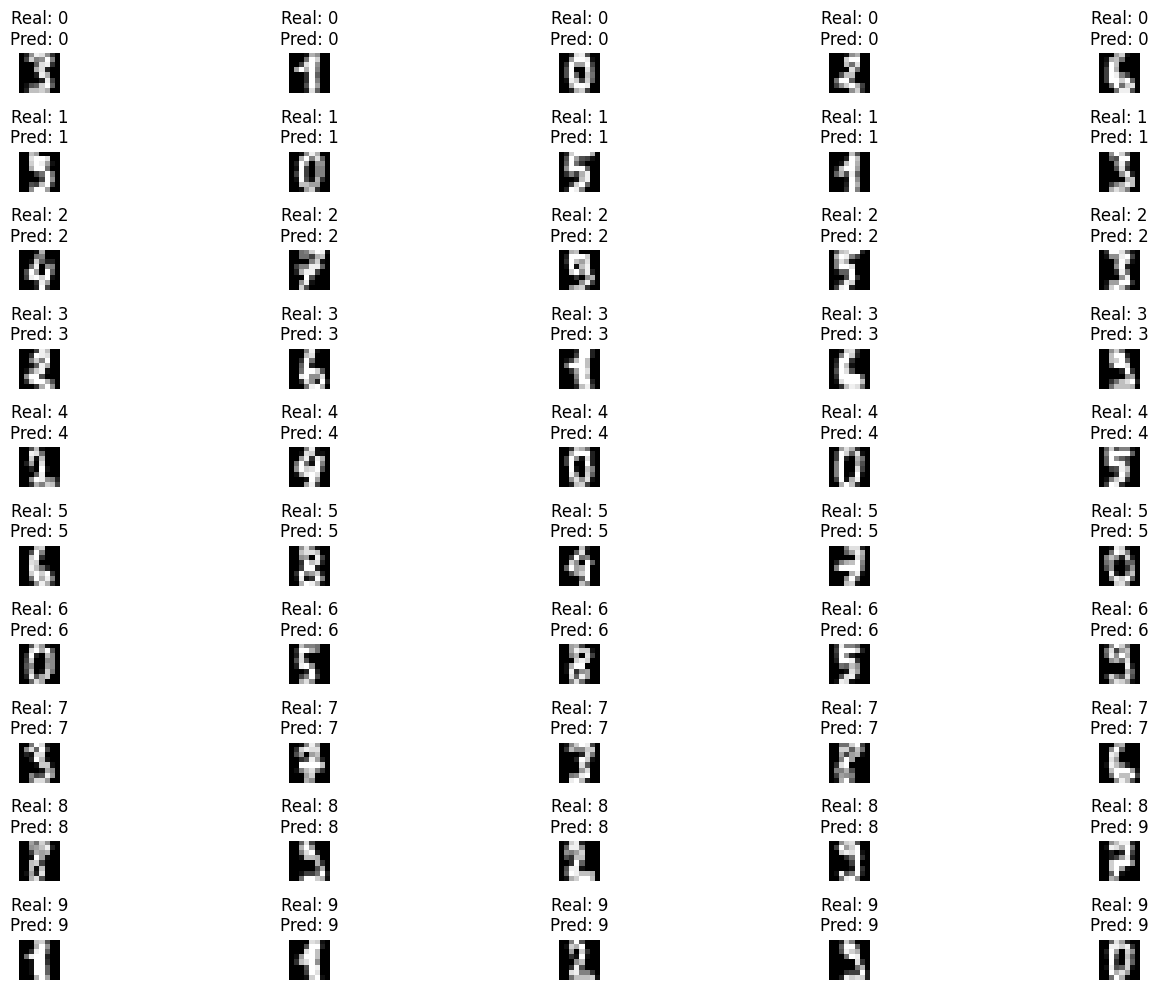

In [442]:
# Number of observations to plot per digit
num_observations_per_digit = 5

plt.figure(figsize=(15, 10))
for digit in range(10):
    # Get the indices of the observations for the current digit
    indices = np.where(y_test == digit)[0][:num_observations_per_digit]
    
    for i, idx in enumerate(indices):
        plt.subplot(10, num_observations_per_digit, digit * num_observations_per_digit + i + 1)
        plt.imshow(digits.images[idx], cmap='gray')
        plt.title(f"Real: {y_test[idx]}\nPred: {y_pred_all[idx]}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### Questions
Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

Based on the classification results, we can observe the following:

1. **ClassifierAll**: Using all 64 variables/pixels/features, the classification performance is the best with an accuracy of 0.987. This is because the classifier has access to the full information of each digit, allowing it to distinguish between different digits more effectively. This method provides the highest accuracy and the most detailed classification performance.

2. **Classifier1col**: Using only the 8 variables/pixels/features from the first column, the classification performance is significantly reduced with an accuracy of 0.393. The first column alone does not provide enough information to accurately distinguish between different digits, leading to a higher rate of misclassification.

3. **Classifier4col**: Using only the 8 variables/pixels/features from the fourth column, the classification performance improves compared to Classifier1col but is still not as good as ClassifierAll, with an accuracy of 0.670. The fourth column contains more distinguishing features than the first column, but it still lacks the full context of the digit.

4. **Classifier8col**: Using only the 8 variables/pixels/features from the eighth column, the classification performance is better than Classifier1col but worse than Classifier4col, with an accuracy of 0.519. The eighth column provides some useful information, but it is not sufficient to achieve high accuracy in classification.

In conclusion, the best classification performance is achieved with ClassifierAll, as it utilizes all available features, providing a comprehensive view of each digit. The reduced feature sets (Classifier1col, Classifier4col, and Classifier8col) result in lower classification performance due to the lack of complete information.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Durante mi Semana Tec, aprendí mucho sobre el análisis de datos y la aplicación de técnicas de clustering y clasificación. Trabajar con el dataset de dígitos y aplicar algoritmos como KMeans y SVM me permitió entender mejor cómo se pueden agrupar y clasificar datos de manera efectiva.

Con estos trabajos, aprendí a:
-**Importar y manejar datos**: Desde la carga de datasets hasta la manipulación y limpieza de datos, comprendí la importancia de preparar adecuadamente los datos antes de cualquier análisis.

-**Visualización de datos**: Utilizar herramientas como matplotlib y seaborn para crear gráficos que ayudan a interpretar mejor los datos y los resultados de los modelos.

-**Aplicar algoritmos de clustering**: Implementar KMeans para agrupar datos y entender cómo determinar el número óptimo de clusters utilizando el método del codo.

-**Clasificación de datos**: Aplicar SVM para clasificar datos y evaluar el rendimiento del modelo utilizando métricas de precisión.

-**Interpretación de resultados**: Analizar los resultados obtenidos de los modelos y proporcionar una descripción detallada de los mismos.

En resumen, esta experiencia me permitió desarrollar habilidades prácticas en análisis de datos y machine learning, que son fundamentales en el campo de la analítica y la ciencia de datos.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Tu respuesta:

Durante el desarrollo de esta actividad, he demostrado mi capacidad para construir modelos bivariados que explican el comportamiento de un fenómeno. A través de la aplicación de técnicas de clustering y clasificación, he podido identificar patrones y relaciones entre variables relevantes en los datasets proporcionados.

**Construcción de modelos bivariados**:
- **Clustering**: Utilicé el algoritmo KMeans para agrupar datos en clusters basados en características específicas. Esto me permitió observar cómo las diferentes variables interactúan y forman grupos naturales dentro del dataset.
- **Clasificación**: Implementé un modelo de clasificación utilizando Support Vector Machines (SVM) para predecir etiquetas de dígitos. Este modelo bivariado me permitió entender cómo las características individuales de los píxeles contribuyen a la identificación de los dígitos.

**Resultados**:
- **Clustering**: Los resultados del clustering mostraron que los datos podían agruparse en clusters bien definidos, lo que sugiere que las variables seleccionadas son efectivas para distinguir entre diferentes grupos.
- **Clasificación**: El modelo de clasificación alcanzó una alta precisión cuando se utilizaron todas las características disponibles, lo que demuestra la importancia de considerar múltiples variables para obtener un modelo preciso.

En resumen, he demostrado mi capacidad para construir y evaluar modelos bivariados que explican el comportamiento de un fenómeno, utilizando técnicas de clustering y clasificación para analizar y predecir patrones en los datos.